# ETL/EDA de ingresos por servicios

In [1]:
#Importar paquetes
import pandas as pd
import matplotlib.pyplot as plt
#Configura la opción de visualización para valores decimales en lugar de notación científica
pd.set_option('display.float_format', '{:.2f}'.format)

## Datos de ingresos por servicio

In [34]:
#Leer los datos de los CSVs de ingresos
rev_internet = pd.read_csv('datasets/ingresos/internet.csv', encoding='utf-8')
rev_tel = pd.read_csv('datasets/ingresos/telefonia_fija.csv', encoding='utf-8')
rev_smart = pd.read_csv('datasets/ingresos/telefonia_movil.csv', encoding='utf-8')

### Ingreso servicio de internet por periodo de tiempo

`Dataframe: rev_internet`

Este dataframe contiene información sobre el ingreso por servicios de internet de los ciudadanos de la Republica Argentina, estimado en miles de pesos durante un periodo de tiempo.

Descripcion:
- Año: periodo de tiempo donde se evaluan los accesos. 
- Trimestre: subdivisiones del periodo año.
- Ingresos (miles de pesos): cantidad de monto embolsado durante un periodo de tiempo en pesos
- Periodo: trimestre detallado por meses y año especifico.

In [35]:
#Tamaño de dataframe
rev_internet.shape

(33, 4)

In [36]:
#Resumen de primeros datos
rev_internet.head(3)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,1,51.432.896,Ene-Mar 2022
1,2021,4,45.467.887,Oct-Dic 2021
2,2021,3,42.999.944,Jul-Sept 2021


In [37]:
#Reemplazar '.' con ''
rev_internet['Ingresos (miles de pesos)'] = rev_internet['Ingresos (miles de pesos)'].str.replace('.','')

In [38]:
#Valores nulos y el tipo de datos de las series
print(rev_internet.isnull().sum())
print(rev_internet.dtypes)

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64
Año                           int64
Trimestre                     int64
Ingresos (miles de pesos)    object
Periodo                      object
dtype: object


In [39]:
#Transformar str a float
rev_internet['Ingresos (miles de pesos)'] = rev_internet['Ingresos (miles de pesos)'].astype(float)

In [40]:
#Eliminar columnas innecesarias
rev_internet = rev_internet.drop(['Trimestre','Periodo'], axis=1)

In [41]:
#Agrupar datos por año promediando trimestres
rev_internet = rev_internet.groupby('Año').mean().reset_index()

In [42]:
rev_internet.describe()

,Año,Ingresos (miles de pesos)
count,9.000000,9.000000e+00
mean,2018.000000,2.064849e+07
std,2.738613,1.719916e+07
min,2014.000000,3.420987e+06
25%,2016.000000,6.716877e+06
50%,2018.000000,1.488490e+07
75%,2020.000000,3.189646e+07
max,2022.000000,5.143290e+07


### Ingreso servicio de telefonia fija por periodo de tiempo

`Dataframe: rev_tel`

Este dataframe contiene información sobre el ingreso por servicios de telefonia fija de los ciudadanos de la Republica Argentina, estimado en miles de pesos durante un periodo de tiempo.

Descripcion:
- Año: periodo de tiempo donde se evaluan los accesos. 
- Trimestre: subdivisiones del periodo año.
- Ingresos (miles de $): cantidad de monto embolsado durante un periodo de tiempo en pesos.

In [44]:
#Tamaño de dataframe
rev_tel.shape

(33, 3)

In [46]:
#Resumen de primeros datos
rev_tel.head(3)

,Año,Trimestre,Ingresos (miles de $)
0,2014,1,"2.916.071,75"
1,2014,2,"2.974.865,2"
2,2014,3,"3.105.462,02"


In [49]:
#Reemplazar '.' con '' y ',' con '.'
rev_tel['Ingresos (miles de $)'] = rev_tel['Ingresos (miles de $)'].str.replace('.','')
rev_tel['Ingresos (miles de $)'] = rev_tel['Ingresos (miles de $)'].str.replace(',','.')

In [52]:
#Valores nulos y el tipo de datos de las series
print(rev_tel.isnull().sum())
print(rev_tel.dtypes)

Año                      0
Trimestre                0
Ingresos (miles de $)    0
dtype: int64
Año                       int64
Trimestre                 int64
Ingresos (miles de $)    object
dtype: object


In [53]:
#Transformar str a float
rev_tel['Ingresos (miles de $)'] = rev_tel['Ingresos (miles de $)'].astype(float)

In [54]:
#Eliminar columnas innecesarias
rev_tel = rev_tel.drop(['Trimestre'], axis=1)

In [55]:
#Agrupar datos por año promediando trimestres
rev_tel = rev_tel.groupby('Año').mean().reset_index()

In [56]:
rev_tel.describe()

,Año,Ingresos (miles de $)
count,9.000000,9.000000e+00
mean,2018.000000,1.240866e+07
std,2.738613,9.163130e+06
min,2014.000000,3.084022e+06
25%,2016.000000,4.708399e+06
50%,2018.000000,8.818128e+06
75%,2020.000000,1.900386e+07
max,2022.000000,2.624087e+07


### Ingreso servicio de telefonia movil por periodo de tiempo

`Dataframe: rev_smart`

Este dataframe contiene información sobre el ingreso por servicios de telefonia movil de los ciudadanos de la Republica Argentina, estimado en miles de pesos durante un periodo de tiempo.

Descripcion:
- Año: periodo de tiempo donde se evaluan los accesos. 
- Trimestre: subdivisiones del periodo año.
- Ingresos (miles de $): cantidad de monto embolsado durante un periodo de tiempo en pesos
- Periodo: trimestre detallado por meses y año especifico.

In [57]:
#Tamaño de dataframe
rev_smart.shape

(33, 4)

In [58]:
#Resumen de primeros datos
rev_smart.head(3)

,Año,Trimestre,Ingresos (miles de $),Periodo
0,2014,1,$ 15.938.353,Ene-Mar 2013
1,2014,2,$ 17.680.972,Abr-Jun 2014
2,2014,3,$ 18.976.053,Jul-Sept 2014


In [59]:
#Reemplazar '$ ' con '' y '.' con ''
rev_smart['Ingresos (miles de $)'] = rev_smart['Ingresos (miles de $)'].str.replace('$ ','')
rev_smart['Ingresos (miles de $)'] = rev_smart['Ingresos (miles de $)'].str.replace('.','')

In [61]:
#Valores nulos y el tipo de datos de las series
print(rev_smart.isnull().sum())
print(rev_smart.dtypes)

Año                      0
Trimestre                0
Ingresos (miles de $)    0
Periodo                  0
dtype: int64
Año                       int64
Trimestre                 int64
Ingresos (miles de $)    object
Periodo                  object
dtype: object


In [62]:
#Transformar str a float
rev_smart['Ingresos (miles de $)'] = rev_smart['Ingresos (miles de $)'].astype(float)

In [63]:
#Eliminar columnas innecesarias
rev_smart = rev_smart.drop(['Trimestre','Periodo'], axis=1)

In [64]:
#Agrupar datos por año promediando trimestres
rev_smart = rev_smart.groupby('Año').mean().reset_index()

In [65]:
rev_smart.describe()

,Año,Ingresos (miles de $)
count,9.000000,9.000000e+00
mean,2018.000000,5.769250e+07
std,2.738613,4.046585e+07
min,2014.000000,1.815193e+07
25%,2016.000000,2.691911e+07
50%,2018.000000,4.167358e+07
75%,2020.000000,7.718249e+07
max,2022.000000,1.304547e+08


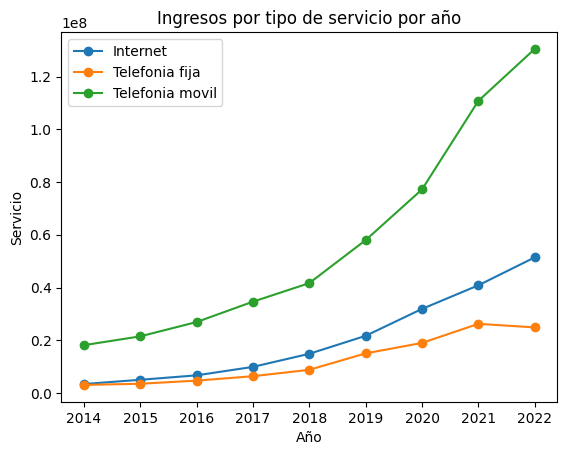

In [67]:
#Creacion del gráfico de líneas
plt.plot(rev_internet['Año'], rev_internet['Ingresos (miles de pesos)'], marker='o', linestyle='-', label='Internet')
plt.plot(rev_tel['Año'], rev_tel['Ingresos (miles de $)'], marker='o', linestyle='-', label='Telefonia fija')
plt.plot(rev_smart['Año'], rev_smart['Ingresos (miles de $)'], marker='o', linestyle='-',label='Telefonia movil')
plt.xlabel('Año')
plt.ylabel('Servicio')
plt.title('Ingresos por tipo de servicio por año')
plt.legend()
plt.show()


#### Conclusion sobre ingresos por tipo de servicio en los ultimos años

`Grafico de lines sugiere una creciemiento abrupto de la telefonia movil`

- Comportamiento de consumo: el incremento en los ingresos de los servicios de telefonia movil podria ser resultado del aumento en el número de suscriptores de telefonia movil, asi tambien de la demanda de servicios adicionales, como planes de datos, servicios de mensajeria y aplicaciones moviles.

- Crecimiento moderado del servicio de internet: esto puede ser resultado de diferentes factores, como barreras de acceso a internet, infraestructura limitada o falta de conciencia y adopcion generalizada de servicios de internet. Los equipos de telefonia movil tienen mayor cantidad de micropagados incluidos dentro del uso cotidiano.

- Disminución en el servicio de telefonia fija: es posible que haya una mayor adopcion de servicios de comunicacion mediante aplicaciones o servicios de mensajeria, que están reemplazando gradualmente el uso de llamadas telefónicas tradicionales. Brindan un menor costo y mayor libertad de tiempo de uso.

- Cambio en la industria de las telecomunicaciones: los proveedores de servicios estan ajustando sus estrategias, como centrarse más en servicios de datos moviles y en la mejora de la infraestructura de internet. Que como hemos visto son los sectores de mayor crecimiento economico y infinitas posibilidades de negocio.